<a href="https://colab.research.google.com/github/YounSooKimTech/Joy_Brand-Study/blob/main/Brand_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2022 ACS datasets

In [185]:
import pandas as pd
import numpy as np

df_election = pd.read_csv("/content/2020_US_Election.csv")

# recode the dataset to show politcal orientation
df_election["Political Orientation"] = np.where(pd.notna(df_election["Biden_EV"]), "Democrats", "Republicans")

df_election.columns

# selection columns
df_election = df_election[['STATE', 'Political Orientation', 'Biden_pct', 'Trump_pct']]

# remove non-state row
df_election = df_election[~df_election["STATE"].str.contains("CD","Totals")]
df_election = df_election[:-1]

# rename column
df_election.rename(columns = {"STATE":"State"}, inplace=True)

# remove the pct sign
df_election["Biden_pct"] = df_election["Biden_pct"].str.replace("%", "")
df_election["Trump_pct"] = df_election["Trump_pct"].str.replace("%", "")

df_election["Biden_pct"] = df_election["Biden_pct"].astype(float)
df_election["Trump_pct"] = df_election["Trump_pct"].astype(float)


df_election

,State,Political Orientation,Biden_pct,Trump_pct
0,Alabama,Republicans,36.57,62.03
1,Alaska,Republicans,42.77,52.83
2,Arizona,Democrats,49.36,49.06
3,Arkansas,Republicans,34.78,62.40
4,California,Democrats,63.48,34.32
5,Colorado,Democrats,55.40,41.90
6,Connecticut,Democrats,59.24,39.21
7,Delaware,Democrats,58.78,39.80
8,District of Columbia,Democrats,92.15,5.40
9,Florida,Republicans,47.86,51.22


In [186]:
import pandas as pd
import numpy as np

df_edu = pd.read_csv("/content/Education.csv")

# Take the total Value only
df_edu = df_edu[df_edu["Unnamed: 1"] == "Total"]

# Select columns
df_edu = df_edu[['Unnamed: 0', 'Total BA']]
df_edu.columns = ["State", "BA or Higher Population"]

df_edu["BA or Higher Population"] = df_edu["BA or Higher Population"].astype(int)

df_edu

,State,BA or Higher Population
0,Alabama,913372
6,Alaska,149266
12,Arizona,1531395
18,Arkansas,507292
24,California,9683841
30,Colorado,1691979
36,Connecticut,1054367
42,Delaware,230181
48,District of Columbia,318115
54,Florida,4839407


In [187]:
import pandas as pd
import numpy as np

df_income = pd.read_csv("/content/median_income.csv")

df_income = df_income[df_income["Type"] == "Households"]

df_income = df_income[['State', 'Total']]

# convert $ into number
df_income["Total"] =df_income["Total"].str.replace(",", "")
df_income["Total"] = df_income["Total"].astype(int)

df_income.columns = ["State", "Median Income"]

df_income

,State,Median Income
0,Alabama,1888504
8,Alaska,255173
16,Arizona,2643430
24,Arkansas,1170544
32,California,13103114
40,Colorado,2137402
48,Connecticut,1385437
56,Delaware,370953
64,District of Columbia,288307
72,Florida,7931313


In [188]:
import pandas as pd
import numpy as np

df_demo = pd.read_csv("/content/demo.csv")

df_demo.head(5)

# remove the row with margin of errors
df_demo = df_demo[~df_demo["State"].str.contains("Error")]

# Make list of state
state_list = df_demo["State"].to_list()
state_list = [state for state in state_list if state not in ['Estimate', 'Percent']]

# number
df_demo_1 = df_demo.loc[df_demo["State"]=="Estimate", ["Total population", "Male", "Female", "Median age (years)"]]
df_demo_1['Total population'] =df_demo_1['Total population'].str.replace(",", "").astype(int)
df_demo_1["Male"] = df_demo_1["Male"].str.replace(",", "").astype(int)
df_demo_1["Female"] = df_demo_1["Female"].str.replace(",", "").astype(int)
df_demo_1["State"] = state_list

# percentage
df_demo_2 = df_demo.loc[df_demo["State"] == "Percent", ["Male", "Female", "White", "Black or African American"]]
df_demo_2.columns = ["Male Pct", "Female Pct", "White Pct", "Black Pct"]
df_demo_2["Male Pct"] = df_demo_2["Male Pct"].str.replace("%", "").astype(float)
df_demo_2["Female Pct"] = df_demo_2["Female Pct"].str.replace("%", "").astype(float)
df_demo_2["White Pct"] = df_demo_2["White Pct"].str.replace("%", "").astype(float)
df_demo_2["Black Pct"] = df_demo_2["Black Pct"].str.replace("%", "").astype(float)
df_demo_2["State"] = state_list

df_demo_total = pd.merge(df_demo_1, df_demo_2, on="State")
print(df_demo_total.columns)

df_demo_total = df_demo_total[["State", "Total population", "Median age (years)", "Male Pct", "Female Pct", "White Pct", "Black Pct"]]

Index(['Total population', 'Male', 'Female', 'Median age (years)', 'State',
       'Male Pct', 'Female Pct', 'White Pct', 'Black Pct'],
      dtype='object')


In [189]:
# Merge the whole dataset

df_temp_1 = pd.merge(df_demo_total, df_income, on="State")
df_temp_2 = pd.merge(df_temp_1, df_edu)

# Calculate pct of education
df_temp_2["BA Pct"] = df_temp_2["BA or Higher Population"]/df_temp_2["Total population"] * 100
df_temp_2["BA Pct"] = round(df_temp_2["BA Pct"], 2)

df_total = pd.merge(df_temp_2, df_election, on="State")

df_total.to_csv("2020_info.csv", index=False)
df_total

,State,Total population,Median age (years),Male Pct,Female Pct,White Pct,Black Pct,Median Income,BA or Higher Population,BA Pct,Political Orientation,Biden_pct,Trump_pct
0,Alabama,4893186,39.2,48.3,51.7,67.5,26.6,1888504,913372,18.67,Republicans,36.57,62.03
1,Alaska,736990,34.6,52.2,47.8,63.4,3.2,255173,149266,20.25,Republicans,42.77,52.83
2,Arizona,7174064,37.9,49.7,50.3,73.8,4.5,2643430,1531395,21.35,Democrats,49.36,49.06
3,Arkansas,3011873,38.3,49.1,50.9,75.4,15.2,1170544,507292,16.84,Republicans,34.78,62.40
4,California,39346023,36.7,49.7,50.3,56.1,5.7,13103114,9683841,24.61,Democrats,63.48,34.32
5,Colorado,5684926,36.9,50.3,49.7,81.5,4.1,2137402,1691979,29.76,Democrats,55.40,41.90
6,Connecticut,3570549,41.1,48.8,51.2,74.2,10.7,1385437,1054367,29.53,Democrats,59.24,39.21
7,Delaware,967679,41.0,48.3,51.7,67.4,22.0,370953,230181,23.79,Democrats,58.78,39.80
8,District of Columbia,701974,34.1,47.5,52.5,41.1,45.4,288307,318115,45.32,Democrats,92.15,5.40
9,Florida,21216924,42.2,48.9,51.1,71.6,15.9,7931313,4839407,22.81,Republicans,47.86,51.22


# Google Trend Brands

In [190]:
# Liberal: CNN, H&M, Advil, Subaru, Trader's Joe, (Chipotle)
# Conservative: Fox News, Belk, Aspirin, Chevrolet, Sam's Club, (Apple Bees)

In [191]:
import pandas as pd

df_brand = pd.read_csv("/content/Google_Trend_Brand.csv")

df_brand.columns

df_brand_s = df_brand[['Region', 'Cable Network', 'Car', 'Department Store', 'Grocery Store', 'Pain Reliever']]

df_brand_s.columns = ["State", "News", "Car", "Department Store", "Grocery Store", "Pain Reliever"]

df_brand_s = df_brand_s[:-1]

df_brand_s

,State,News,Car,Department Store,Grocery Store,Pain Reliever
0,Alabama,Fox News,Chevrolet,Belk,Sam's Club,Aspirin
1,Alaska,Fox News,Subaru,H&M,Sam's Club,Aspirin
2,Arizona,Fox News,Chevrolet,H&M,Sam's Club,Aspirin
3,Arkansas,Fox News,Chevrolet,Belk,Sam's Club,Aspirin
4,California,CNN,Subaru,H&M,TraderJoe's,Advil
5,Colorado,CNN,Subaru,H&M,Sam's Club,Aspirin
6,Connecticut,CNN,Subaru,H&M,TraderJoe's,Advil
7,Delaware,CNN,Subaru,H&M,Sam's Club,Advil
8,District of Columbia,CNN,Subaru,H&M,TraderJoe's,Advil
9,Florida,CNN,Chevrolet,H&M,Sam's Club,Aspirin


# All the dataset

In [192]:
import numpy as np

df_total = pd.merge(df_total, df_brand_s, on="State")
df_total

,State,Total population,Median age (years),Male Pct,Female Pct,White Pct,Black Pct,Median Income,BA or Higher Population,BA Pct,Political Orientation,Biden_pct,Trump_pct,News,Car,Department Store,Grocery Store,Pain Reliever
0,Alabama,4893186,39.2,48.3,51.7,67.5,26.6,1888504,913372,18.67,Republicans,36.57,62.03,Fox News,Chevrolet,Belk,Sam's Club,Aspirin
1,Alaska,736990,34.6,52.2,47.8,63.4,3.2,255173,149266,20.25,Republicans,42.77,52.83,Fox News,Subaru,H&M,Sam's Club,Aspirin
2,Arizona,7174064,37.9,49.7,50.3,73.8,4.5,2643430,1531395,21.35,Democrats,49.36,49.06,Fox News,Chevrolet,H&M,Sam's Club,Aspirin
3,Arkansas,3011873,38.3,49.1,50.9,75.4,15.2,1170544,507292,16.84,Republicans,34.78,62.40,Fox News,Chevrolet,Belk,Sam's Club,Aspirin
4,California,39346023,36.7,49.7,50.3,56.1,5.7,13103114,9683841,24.61,Democrats,63.48,34.32,CNN,Subaru,H&M,TraderJoe's,Advil
5,Colorado,5684926,36.9,50.3,49.7,81.5,4.1,2137402,1691979,29.76,Democrats,55.40,41.90,CNN,Subaru,H&M,Sam's Club,Aspirin
6,Connecticut,3570549,41.1,48.8,51.2,74.2,10.7,1385437,1054367,29.53,Democrats,59.24,39.21,CNN,Subaru,H&M,TraderJoe's,Advil
7,Delaware,967679,41.0,48.3,51.7,67.4,22.0,370953,230181,23.79,Democrats,58.78,39.80,CNN,Subaru,H&M,Sam's Club,Advil
8,District of Columbia,701974,34.1,47.5,52.5,41.1,45.4,288307,318115,45.32,Democrats,92.15,5.40,CNN,Subaru,H&M,TraderJoe's,Advil
9,Florida,21216924,42.2,48.9,51.1,71.6,15.9,7931313,4839407,22.81,Republicans,47.86,51.22,CNN,Chevrolet,H&M,Sam's Club,Aspirin


In [193]:
df_total["log_population"] = np.log(df_total["Total population"])
df_total["log_median_income"] = np.log(df_total["Median Income"])

df_total.head(5)

,State,Total population,Median age (years),Male Pct,Female Pct,White Pct,Black Pct,Median Income,BA or Higher Population,BA Pct,Political Orientation,Biden_pct,Trump_pct,News,Car,Department Store,Grocery Store,Pain Reliever,log_population,log_median_income
0,Alabama,4893186,39.2,48.3,51.7,67.5,26.6,1888504,913372,18.67,Republicans,36.57,62.03,Fox News,Chevrolet,Belk,Sam's Club,Aspirin,15.403354,14.451296
1,Alaska,736990,34.6,52.2,47.8,63.4,3.2,255173,149266,20.25,Republicans,42.77,52.83,Fox News,Subaru,H&M,Sam's Club,Aspirin,13.510330,12.449697
2,Arizona,7174064,37.9,49.7,50.3,73.8,4.5,2643430,1531395,21.35,Democrats,49.36,49.06,Fox News,Chevrolet,H&M,Sam's Club,Aspirin,15.785983,14.787588
3,Arkansas,3011873,38.3,49.1,50.9,75.4,15.2,1170544,507292,16.84,Republicans,34.78,62.40,Fox News,Chevrolet,Belk,Sam's Club,Aspirin,14.918073,13.972979
4,California,39346023,36.7,49.7,50.3,56.1,5.7,13103114,9683841,24.61,Democrats,63.48,34.32,CNN,Subaru,H&M,TraderJoe's,Advil,17.487905,16.388360


In [194]:
df_total = df_total.rename(columns={"Median age (years)":"Median Age"})

df_total.head(2)

,State,Total population,Median Age,Male Pct,Female Pct,White Pct,Black Pct,Median Income,BA or Higher Population,BA Pct,Political Orientation,Biden_pct,Trump_pct,News,Car,Department Store,Grocery Store,Pain Reliever,log_population,log_median_income
0,Alabama,4893186,39.2,48.3,51.7,67.5,26.6,1888504,913372,18.67,Republicans,36.57,62.03,Fox News,Chevrolet,Belk,Sam's Club,Aspirin,15.403354,14.451296
1,Alaska,736990,34.6,52.2,47.8,63.4,3.2,255173,149266,20.25,Republicans,42.77,52.83,Fox News,Subaru,H&M,Sam's Club,Aspirin,13.510330,12.449697


In [195]:
# Democrats = 1, Republicans = 0
import numpy as np

df_total["B_politics"] = np.where(df_total["Political Orientation"] == "Republicans", 0, 1)

df_total.head(5)

,State,Total population,Median Age,Male Pct,Female Pct,White Pct,Black Pct,Median Income,BA or Higher Population,BA Pct,...,Biden_pct,Trump_pct,News,Car,Department Store,Grocery Store,Pain Reliever,log_population,log_median_income,B_politics
0,Alabama,4893186,39.2,48.3,51.7,67.5,26.6,1888504,913372,18.67,...,36.57,62.03,Fox News,Chevrolet,Belk,Sam's Club,Aspirin,15.403354,14.451296,0
1,Alaska,736990,34.6,52.2,47.8,63.4,3.2,255173,149266,20.25,...,42.77,52.83,Fox News,Subaru,H&M,Sam's Club,Aspirin,13.510330,12.449697,0
2,Arizona,7174064,37.9,49.7,50.3,73.8,4.5,2643430,1531395,21.35,...,49.36,49.06,Fox News,Chevrolet,H&M,Sam's Club,Aspirin,15.785983,14.787588,1
3,Arkansas,3011873,38.3,49.1,50.9,75.4,15.2,1170544,507292,16.84,...,34.78,62.40,Fox News,Chevrolet,Belk,Sam's Club,Aspirin,14.918073,13.972979,0
4,California,39346023,36.7,49.7,50.3,56.1,5.7,13103114,9683841,24.61,...,63.48,34.32,CNN,Subaru,H&M,TraderJoe's,Advil,17.487905,16.388360,1


In [196]:
df_total.columns = df_total.columns.str.replace(" ", "_")

In [197]:
df_total.columns

Index(['State', 'Total_population', 'Median_Age', 'Male_Pct', 'Female_Pct',
       'White_Pct', 'Black_Pct', 'Median_Income', 'BA_or_Higher_Population',
       'BA_Pct', 'Political_Orientation', 'Biden_pct', 'Trump_pct', 'News',
       'Car', 'Department_Store', 'Grocery_Store', 'Pain_Reliever',
       'log_population', 'log_median_income', 'B_politics'],
      dtype='object')

In [200]:
df_total.to_csv("df_2020_election.csv", index=False)

In [202]:
df_total.corr()

<ipython-input-202-3b1ffd33522f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_total.corr()


,Total_population,Male_Pct,Female_Pct,White_Pct,Black_Pct,Median_Income,BA_or_Higher_Population,BA_Pct,Biden_pct,Trump_pct,log_population,log_median_income,B_politics
Total_population,1.000000,-0.165200,0.165200,-0.252639,0.116890,0.996707,0.988188,0.038471,0.192345,-0.168942,0.828427,0.819948,0.112653
Male_Pct,-0.165200,1.000000,-1.000000,0.299228,-0.720513,-0.190325,-0.177049,-0.309191,-0.422554,0.382257,-0.335214,-0.351609,-0.224031
Female_Pct,0.165200,-1.000000,1.000000,-0.299228,0.720513,0.190325,0.177049,0.309191,0.422554,-0.382257,0.335214,0.351609,0.224031
White_Pct,-0.252639,0.299228,-0.299228,1.000000,-0.591504,-0.240251,-0.269207,-0.239409,-0.487639,0.473566,-0.215770,-0.187240,-0.266772
Black_Pct,0.116890,-0.720513,0.720513,-0.591504,1.000000,0.130112,0.105703,0.183504,0.266879,-0.238079,0.232286,0.234159,-0.005874
Median_Income,0.996707,-0.190325,0.190325,-0.240251,0.130112,1.000000,0.985534,0.040054,0.190402,-0.164927,0.854580,0.848583,0.114617
BA_or_Higher_Population,0.988188,-0.177049,0.177049,-0.269207,0.105703,0.985534,1.000000,0.138654,0.271503,-0.250124,0.819332,0.811100,0.200406
BA_Pct,0.038471,-0.309191,0.309191,-0.239409,0.183504,0.040054,0.138654,1.000000,0.851777,-0.859188,-0.038231,-0.032103,0.621381
Biden_pct,0.192345,-0.422554,0.422554,-0.487639,0.266879,0.190402,0.271503,0.851777,1.000000,-0.997999,0.108037,0.106164,0.790509
Trump_pct,-0.168942,0.382257,-0.382257,0.473566,-0.238079,-0.164927,-0.250124,-0.859188,-0.997999,1.000000,-0.074063,-0.071258,-0.788295


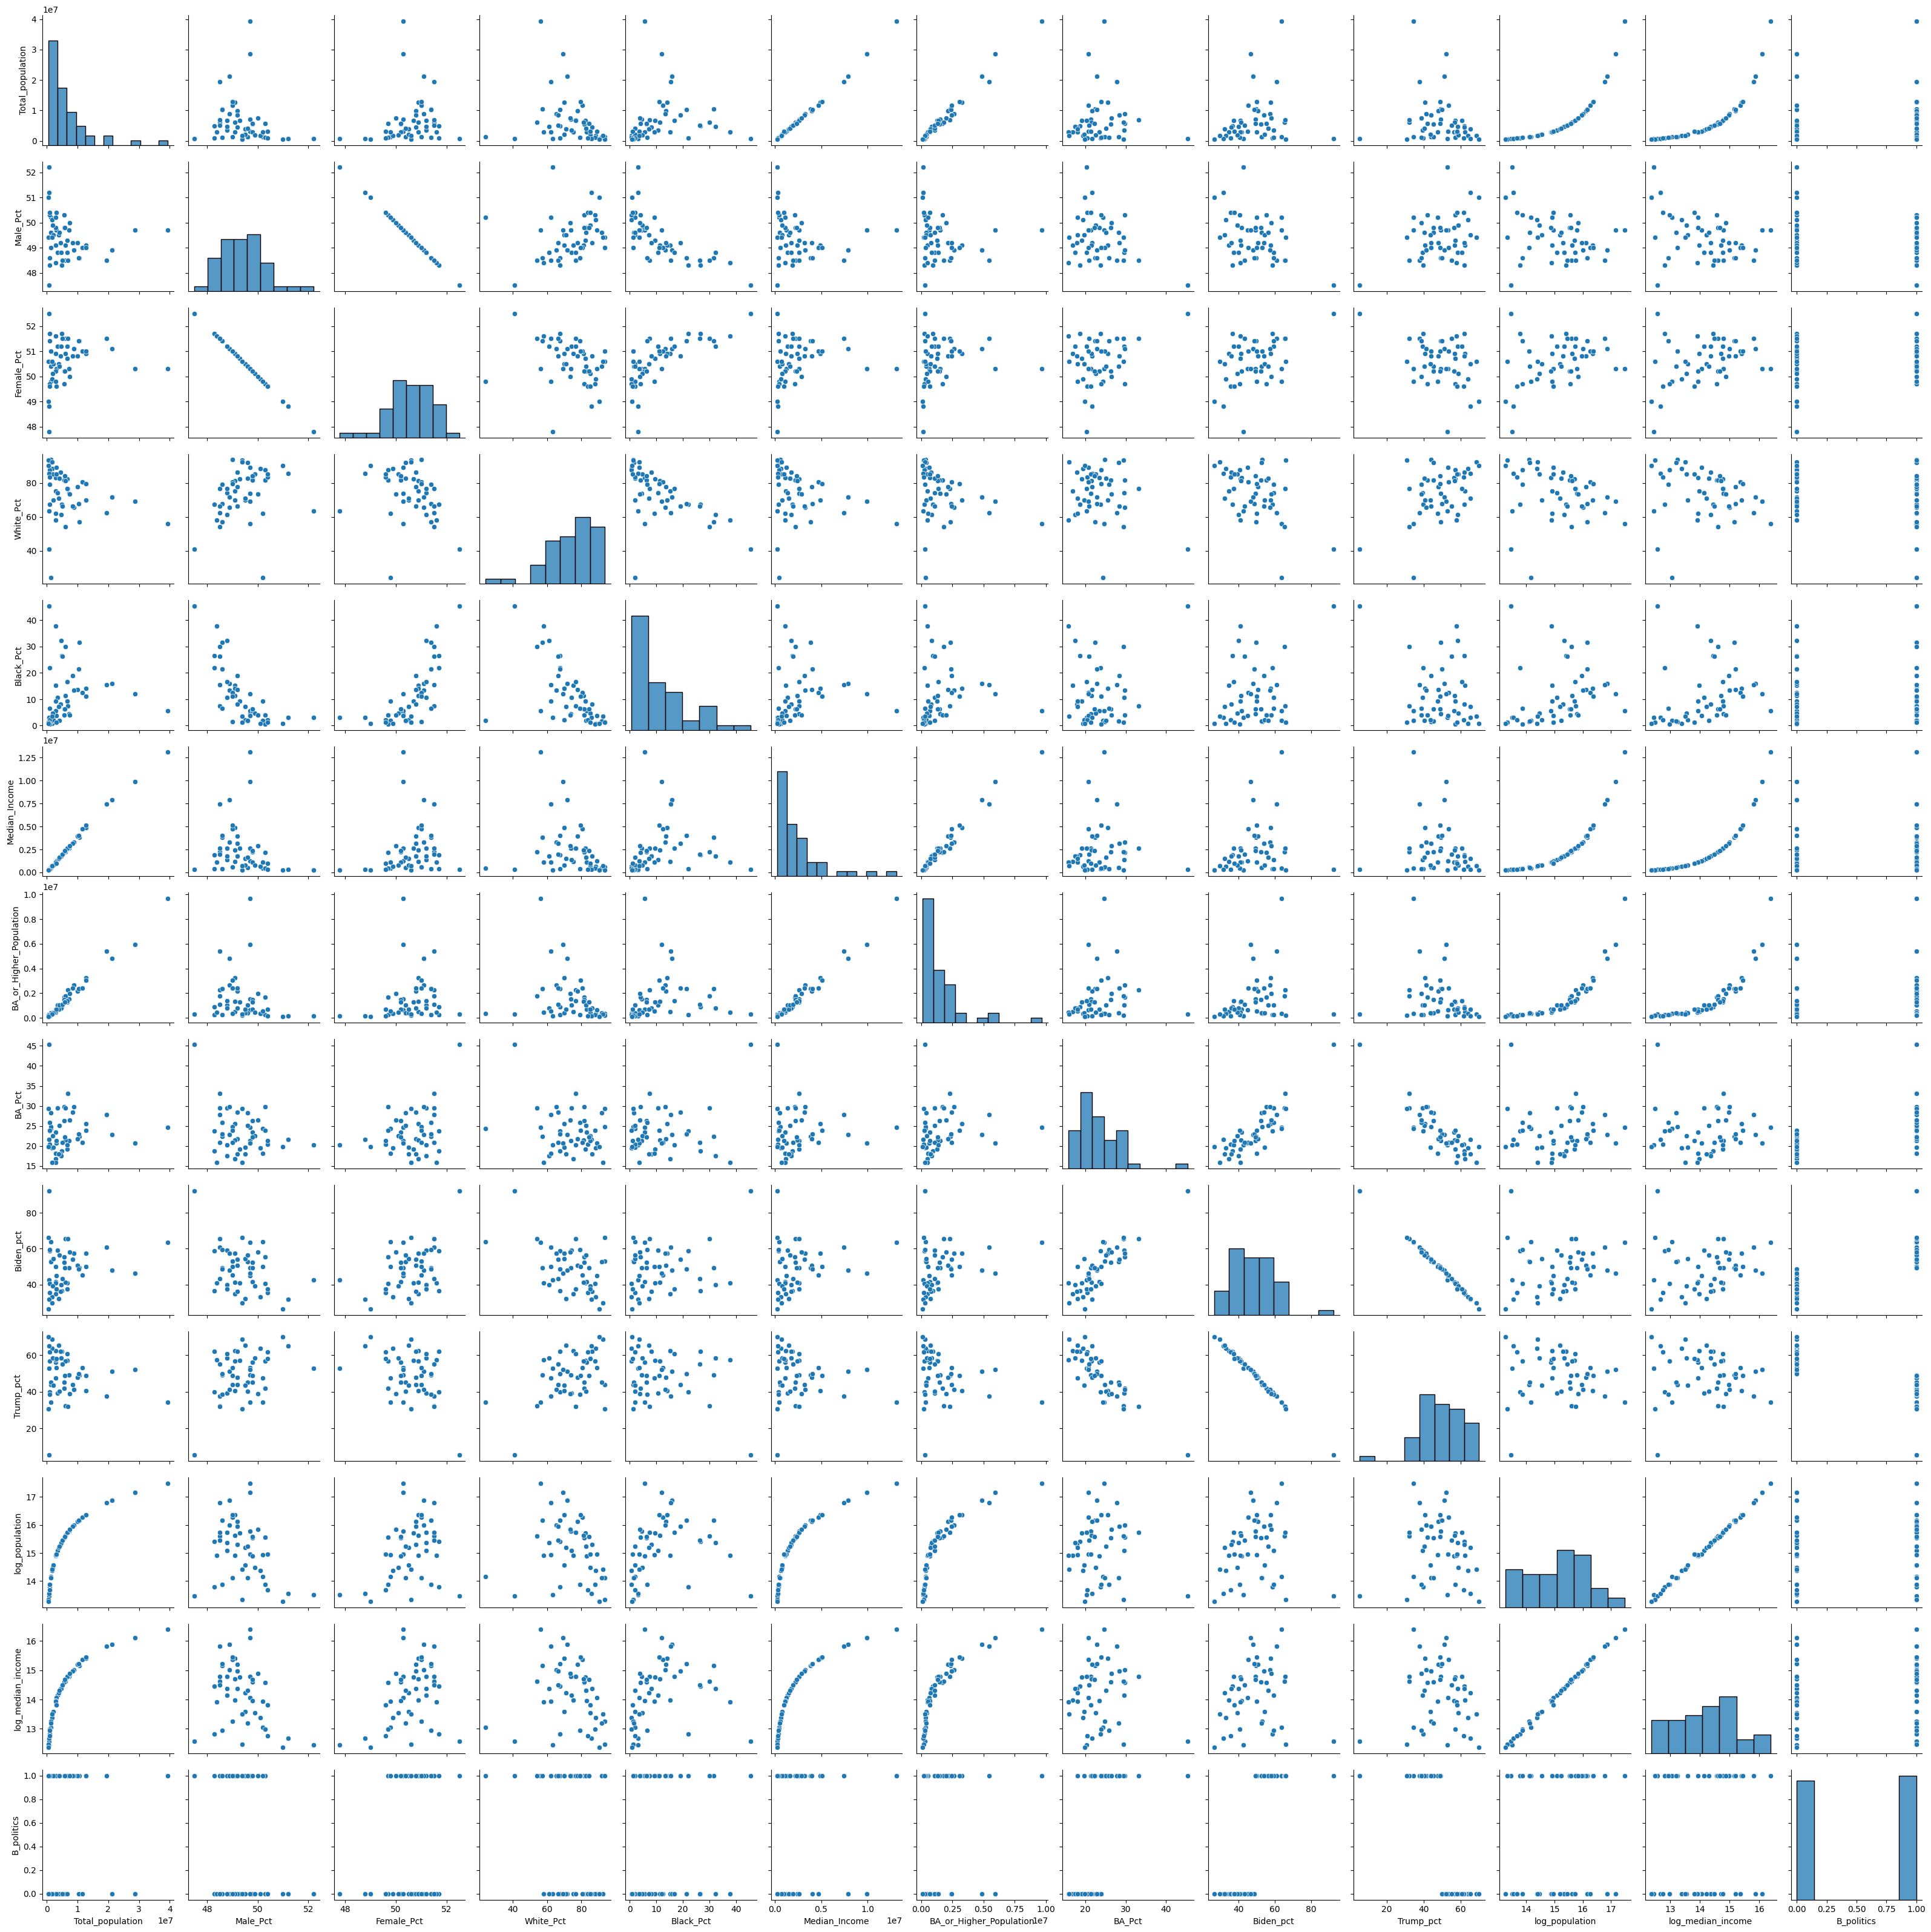

In [201]:
import seaborn as sns

sns.pairplot(df_total)

In [206]:
df_total["Median_Age"] = df_total["Median_Age"].astype(float)

df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    51 non-null     object 
 1   Total_population         51 non-null     int64  
 2   Median_Age               51 non-null     float64
 3   Male_Pct                 51 non-null     float64
 4   Female_Pct               51 non-null     float64
 5   White_Pct                51 non-null     float64
 6   Black_Pct                51 non-null     float64
 7   Median_Income            51 non-null     int64  
 8   BA_or_Higher_Population  51 non-null     int64  
 9   BA_Pct                   51 non-null     float64
 10  Political_Orientation    51 non-null     object 
 11  Biden_pct                51 non-null     float64
 12  Trump_pct                51 non-null     float64
 13  News                     50 non-null     object 
 14  Car                      51 

In [203]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "B_politics ~ Median_Age"

model = smf.ols(formula, data=df_total)

# Fit the model
result = model.fit()

# Print the summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             B_politics   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                 -0.074
Method:                 Least Squares   F-statistic:                    0.9041
Date:                Thu, 14 Mar 2024   Prob (F-statistic):              0.615
Time:                        16:50:58   Log-Likelihood:                -6.3695
No. Observations:                  51   AIC:                             86.74
Df Residuals:                      14   BIC:                             158.2
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.797e-17      0

In [208]:
df_total.columns

Index(['State', 'Total_population', 'Median_Age', 'Male_Pct', 'Female_Pct',
       'White_Pct', 'Black_Pct', 'Median_Income', 'BA_or_Higher_Population',
       'BA_Pct', 'Political_Orientation', 'Biden_pct', 'Trump_pct', 'News',
       'Car', 'Department_Store', 'Grocery_Store', 'Pain_Reliever',
       'log_population', 'log_median_income', 'B_politics'],
      dtype='object')

In [211]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "B_politics ~ Median_Age + log_population + log_median_income + Male_Pct + White_Pct + BA_Pct "

model = smf.logit(formula, data=df_total)

# Fit the model
result = model.fit()

# Print the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.293094
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             B_politics   No. Observations:                   51
Model:                          Logit   Df Residuals:                       44
Method:                           MLE   Df Model:                            6
Date:                Thu, 14 Mar 2024   Pseudo R-squ.:                  0.5770
Time:                        16:53:23   Log-Likelihood:                -14.948
converged:                       True   LL-Null:                       -35.341
Covariance Type:            nonrobust   LLR p-value:                 3.191e-07
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -57.6238     52.643     -1.095      0.274    -160.803      45.555
Median_A

# Political Orientation Result

In [92]:
import pandas as pd

df_2017 = pd.read_csv("https://raw.githubusercontent.com/YounSooKimTech/Joy_Brand-Study/main/Data/2017_Political%20Association%20of%20Brands%20on%20Twitter.csv")
df_2022 = pd.read_csv("https://raw.githubusercontent.com/YounSooKimTech/Joy_Brand-Study/main/Data/2022_Political%20Associations%20of%20Brands%20on%20Twitter.csv")

In [93]:
df_2022.columns

Index(['Brand_Name', 'Proportion Democrats', 'Proportion Republicans',
       'Lift Democrats', 'Lift Republicans'],
      dtype='object')

In [94]:
import numpy as np

# Political Orientation
df_2017["PoliticalOrientation"] = np.where(df_2017["Proportion Democrats"]>df_2017["Proportion Republicans"], "Democrats", "Republicans")
df_2022["PoliticalOrientation"] = np.where(df_2022["Proportion Democrats"]>df_2022["Proportion Republicans"], "Democrats", "Republicans")


# Abs difference
df_2017["Diff"] = np.abs(df_2017["Proportion Democrats"] - df_2017["Proportion Republicans"])
df_2022["Diff"] = np.abs(df_2022["Proportion Democrats"] - df_2022["Proportion Republicans"])


In [95]:
df_2017 = df_2017[['Brand_Name', 'Proportion Democrats', 'Proportion Republicans', 'PoliticalOrientation', 'Diff']]
df_2022 = df_2022[['Brand_Name', 'Proportion Democrats', 'Proportion Republicans', 'PoliticalOrientation', 'Diff']]

In [104]:
df_2017[df_2017["Diff"]>.3].sort_values("Diff", ascending=False)

,Brand_Name,Proportion Democrats,Proportion Republicans,PoliticalOrientation,Diff
394,National Rifle Association,0.051918,0.948082,Republicans,0.896164
460,PPFA,0.923672,0.076328,Democrats,0.847344
568,Toys'R'Us,0.079491,0.920509,Republicans,0.841019
459,PPact,0.919777,0.080223,Democrats,0.839555
63,BGEA,0.081633,0.918367,Republicans,0.836735
...,...,...,...,...,...
45,Audible,0.651463,0.348537,Democrats,0.302925
601,Vikings,0.348959,0.651041,Republicans,0.302082
14,Airbnb,0.650907,0.349093,Democrats,0.301813
416,NHL on NBC,0.349597,0.650403,Republicans,0.300806


In [105]:
df_2022[df_2022["Diff"]>.3].sort_values("Diff", ascending=False)

,Brand_Name,Proportion Democrats,Proportion Republicans,PoliticalOrientation,Diff
283,Conserv_Tribune,0.020517,0.979483,Republicans,0.958966
1124,Therightscoop,0.028351,0.971649,Republicans,0.943297
955,Rickrwells,0.031123,0.968877,Republicans,0.937754
1145,Tpinsidr,0.036109,0.963891,Republicans,0.927783
939,Redstate,0.037858,0.962142,Republicans,0.924283
...,...,...,...,...,...
1006,Seamless,0.652194,0.347806,Democrats,0.304389
698,Marketwatch,0.347997,0.652003,Republicans,0.304005
670,Loews_Hotels,0.651481,0.348519,Democrats,0.302961
625,Kronenbourg1664,0.650943,0.349057,Democrats,0.301887


In [96]:
df_merged = pd.merge(df_2017, df_2022, how='outer', on='Brand_Name', suffixes=('_2017', '_2022'))

df_merged_1 = df_merged.dropna()

print(len(df_merged))
print(len(df_merged_1))

1730
196


In [101]:
df_merged[(df_merged["Diff_2017"] > 0.2) | (df_merged["Diff_2022"] > 0.2)]

,Brand_Name,Proportion Democrats_2017,Proportion Republicans_2017,PoliticalOrientation_2017,Diff_2017,Proportion Democrats_2022,Proportion Republicans_2022,PoliticalOrientation_2022,Diff_2022
0,3M,0.165855,0.834145,Republicans,0.668290,NaN,NaN,NaN,NaN
5,Academy Sports + Outdoors,0.221474,0.778526,Republicans,0.557052,NaN,NaN,NaN,NaN
6,Ace Hardware,0.266230,0.733770,Republicans,0.467541,NaN,NaN,NaN,NaN
7,ACLU,0.904319,0.095681,Democrats,0.808639,NaN,NaN,NaN,NaN
8,Acura,0.377744,0.622256,Republicans,0.244512,0.461473,0.538527,Republicans,0.077054
...,...,...,...,...,...,...,...,...,...
1717,Ymca,NaN,NaN,NaN,NaN,0.602929,0.397071,Democrats,0.205858
1721,Yuenglingbeer,NaN,NaN,NaN,NaN,0.336601,0.663399,Republicans,0.326797
1725,Zerohedge,NaN,NaN,NaN,NaN,0.137027,0.862973,Republicans,0.725946
1727,Zipcar,NaN,NaN,NaN,NaN,0.733177,0.266823,Democrats,0.466354


In [ ]:
df_merged_1[df_merged_1["PoliticalOrientation_2017"] == df_merged_1["PoliticalOrientation_2022"]]

,Brand_Name,Proportion Democrats_2017,Proportion Republicans_2017,PoliticalOrientation_2017,Diff_2017,Proportion Democrats_2022,Proportion Republicans_2022,PoliticalOrientation_2022,Diff_2022
8,Acura,0.377744,0.622256,Republicans,0.244512,0.461473,0.538527,Republicans,0.077054
10,Adobe,0.535247,0.464753,Democrats,0.070494,0.557780,0.442220,Democrats,0.115560
14,Airbnb,0.650907,0.349093,Democrats,0.301813,0.611333,0.388667,Democrats,0.222666
15,Airbus,0.362488,0.637512,Republicans,0.275023,0.460436,0.539564,Republicans,0.079129
28,Anthropologie,0.627592,0.372408,Democrats,0.255184,0.639048,0.360952,Democrats,0.278096
...,...,...,...,...,...,...,...,...,...
609,Walmart,0.389767,0.610233,Republicans,0.220466,0.480054,0.519946,Republicans,0.039892
621,Wikileaks,0.258324,0.741676,Republicans,0.483352,0.333914,0.666086,Republicans,0.332171
622,Wikipedia,0.533065,0.466935,Democrats,0.066130,0.579540,0.420460,Democrats,0.159080
632,Yelp,0.561151,0.438849,Democrats,0.122302,0.624179,0.375821,Democrats,0.248359
